# Polfilter

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [11]:
def malus(alpha,I_0,A,B,C):
    alpha = np.radians(alpha)
    return I_0 * np.cos(A*alpha-B)*np.cos(A*alpha-B)+C

[3.7775086  1.00739791 2.19391887 0.00744373]


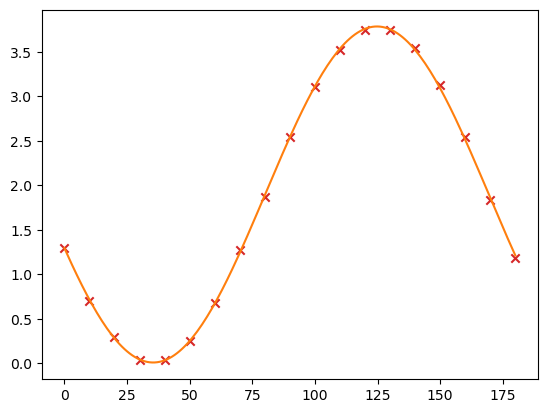

In [17]:
pol2 = np.arange(0,181,10)
pol2_intensity = np.array([1.30,0.70,0.29,0.04,0.03,0.25,0.68,1.27,1.87,2.54,3.11,3.52,3.74,3.74,3.54,3.13,2.54,1.83,1.18])

popt, pcov = curve_fit(malus,pol2,pol2_intensity)
I_0, A, B, C = popt
print(popt)

plt.scatter(pol2,pol2_intensity,marker='x',color='tab:red')

xfit = np.arange(0,181,1)
yfit = malus(xfit,I_0,A,B,C)
plt.plot(xfit,yfit,color='tab:orange')